First few rows of the dataset:
       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                

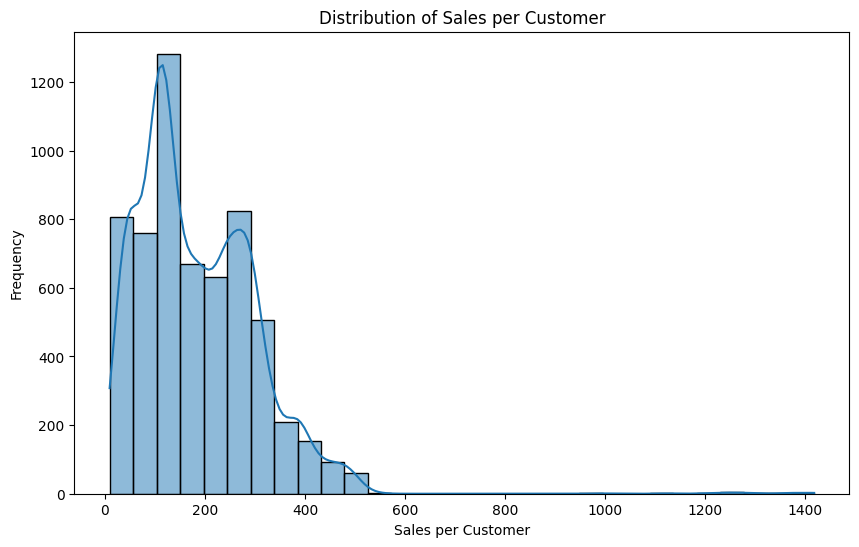

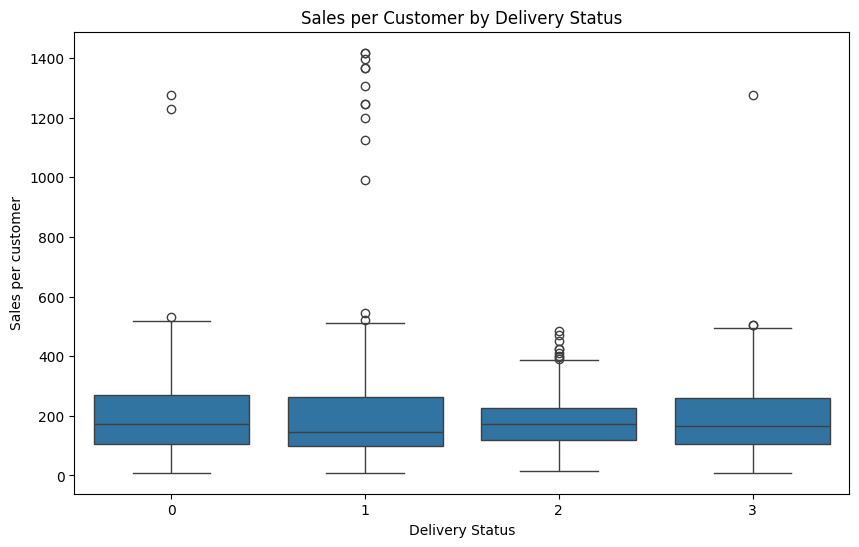

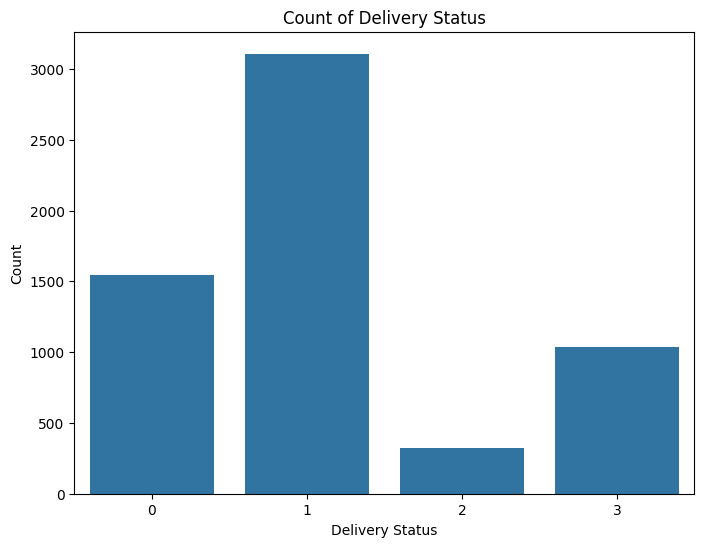

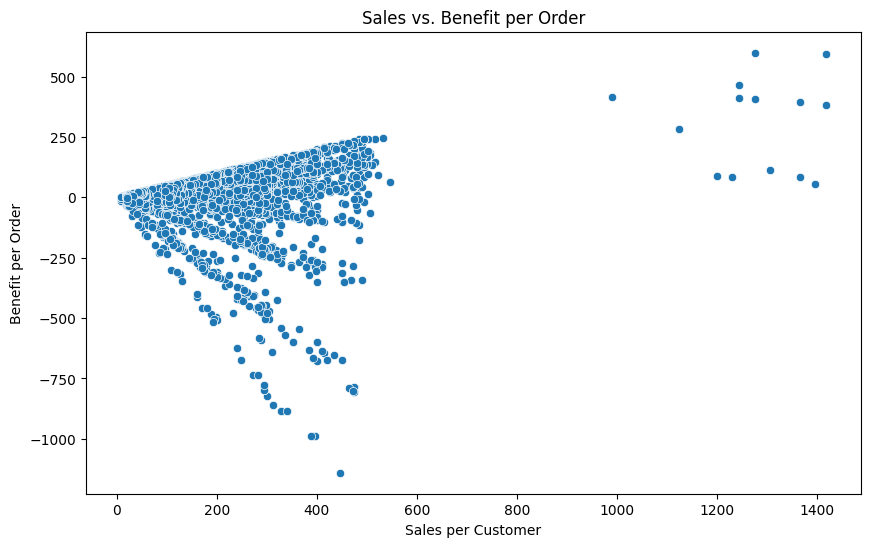

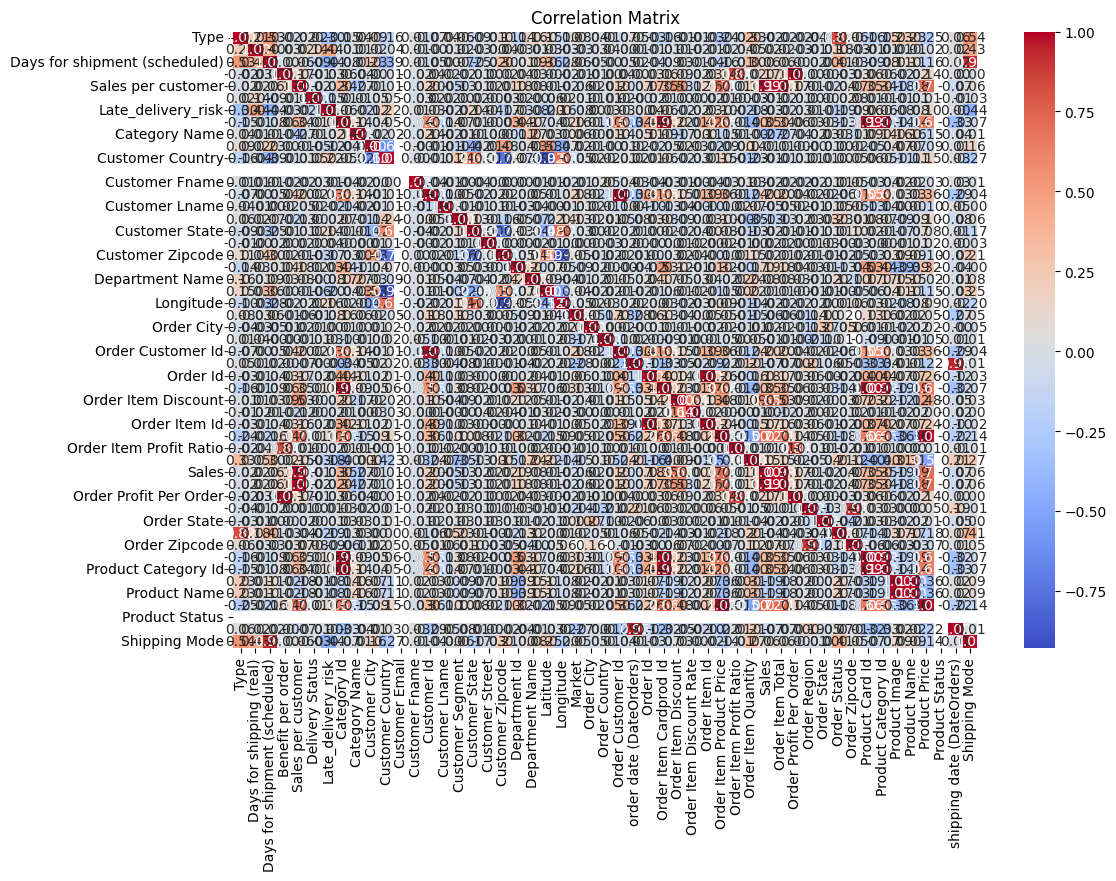


Linear Regression Mean Squared Error: 13607.414549642503

Logistic Regression Accuracy: 0.9783873649210307

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       576
           1       0.96      1.00      0.98       627

    accuracy                           0.98      1203
   macro avg       0.98      0.98      0.98      1203
weighted avg       0.98      0.98      0.98      1203


Random Forest Classifier Accuracy: 0.9733998337489609

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       576
           1       0.96      0.99      0.97       627

    accuracy                           0.97      1203
   macro avg       0.97      0.97      0.97      1203
weighted avg       0.97      0.97      0.97      1203



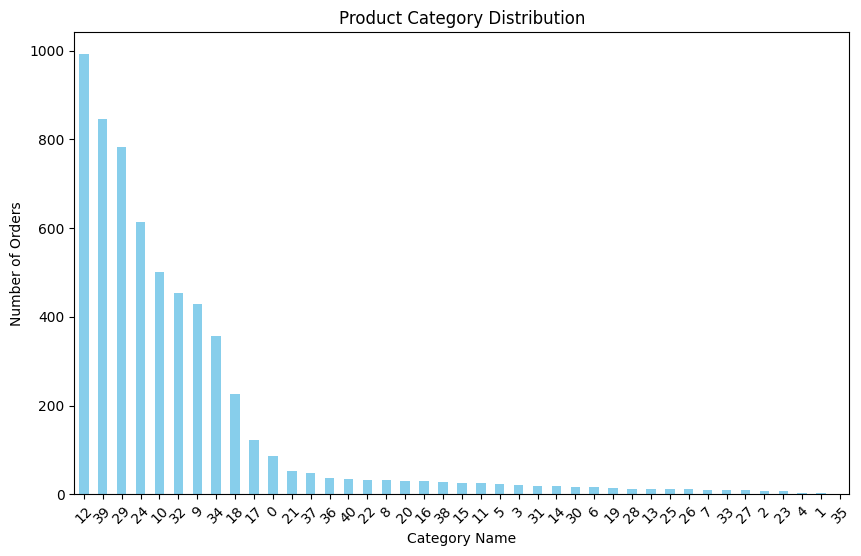

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


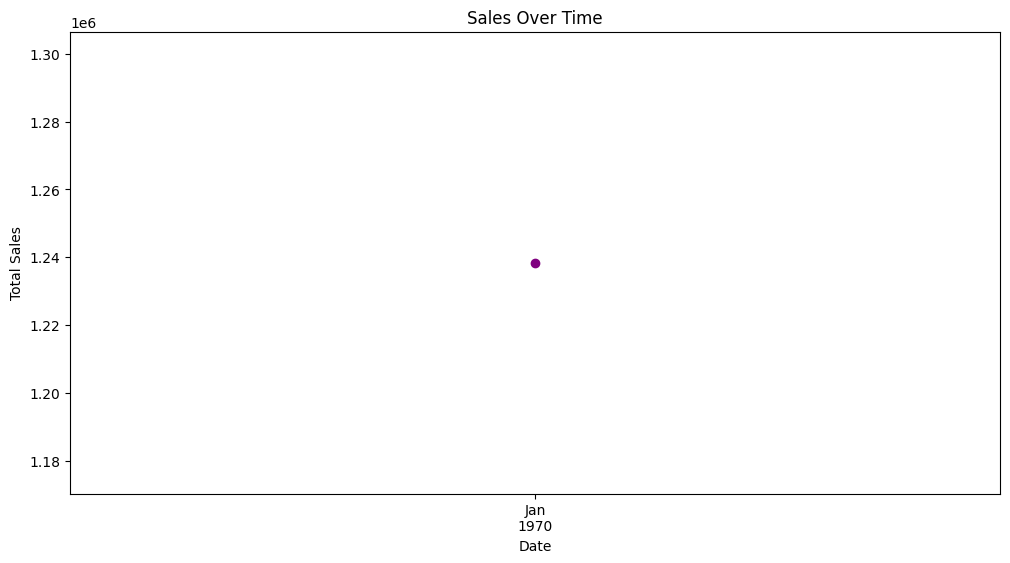

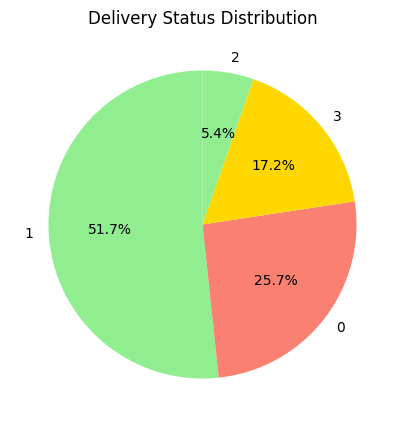

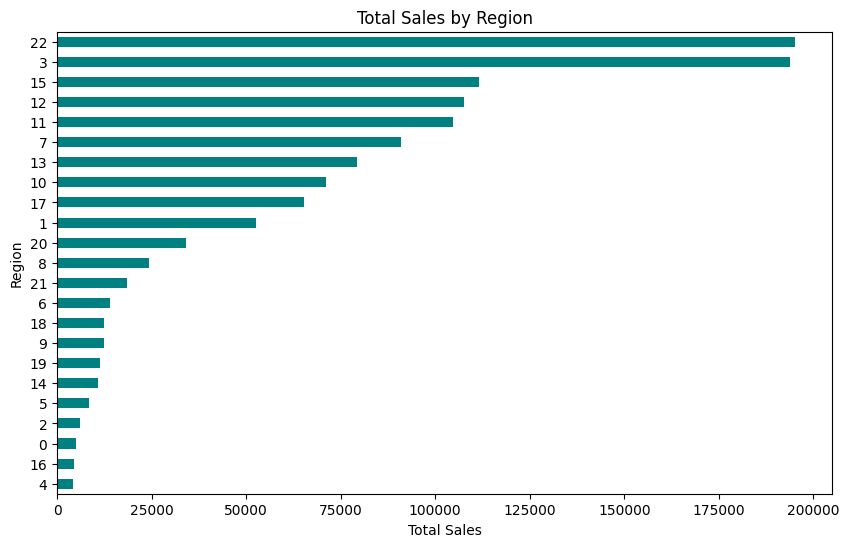

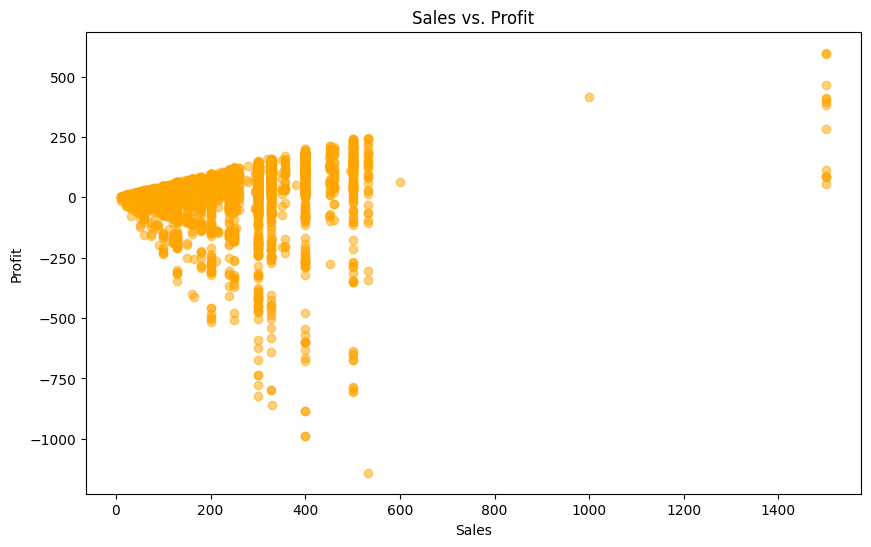

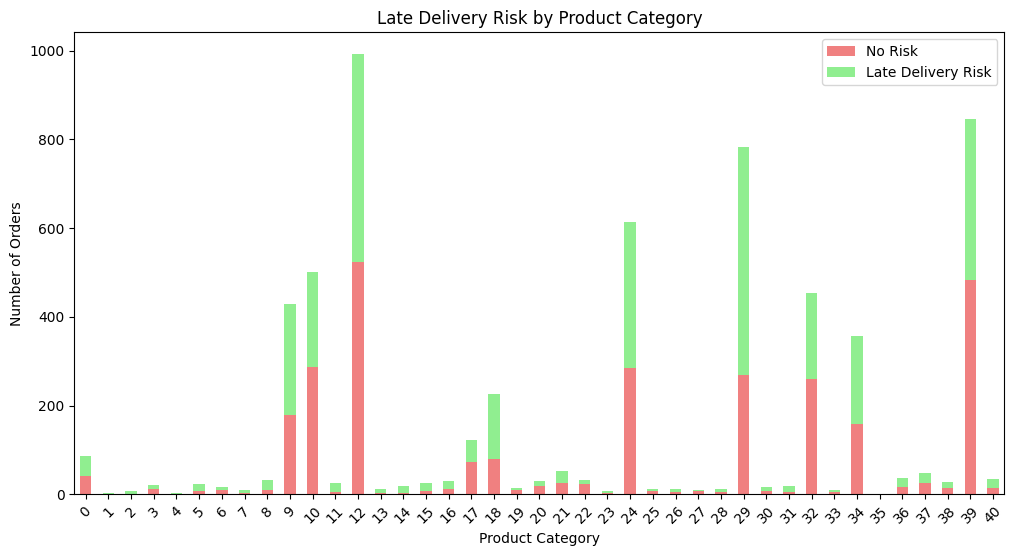

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


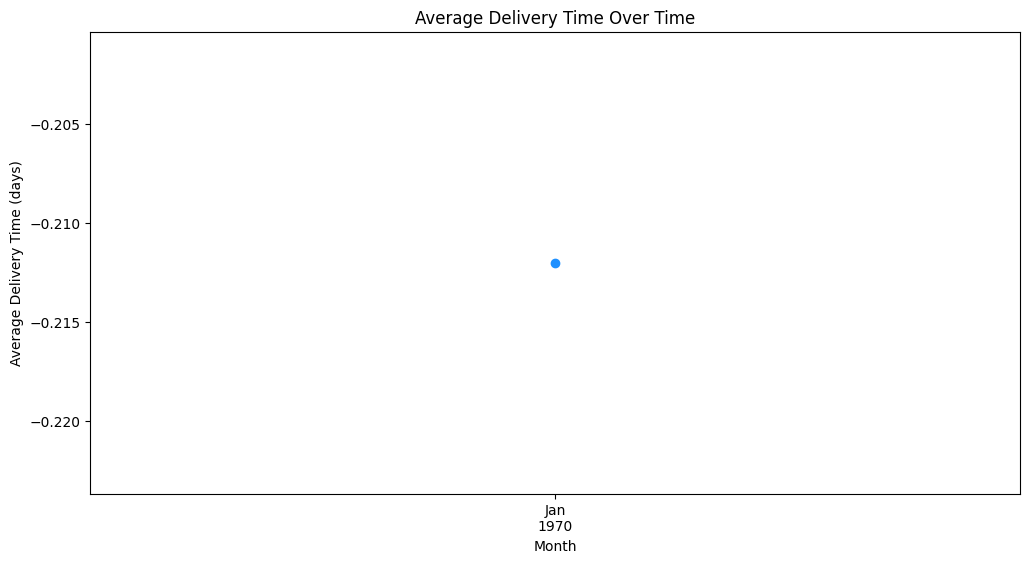

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding_errors="ignore")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display column names to help identify available columns
print("Column names in the dataset:")
print(data.columns)

# Check the shape of the dataset
print(f'\nDataset shape: {data.shape}')

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Basic statistics of the dataset
print("\nBasic statistical summary:")
print(data.describe())

# Drop columns with too many missing values or irrelevant data
data = data.drop(['Product Description', 'Customer Password'], axis=1)

# Convert categorical columns to numeric values (Label Encoding for example)
categorical_columns = data.select_dtypes(include=['object']).columns

# Convert categorical columns to numeric using Label Encoding
for col in categorical_columns:
    data[col] = data[col].astype('category').cat.codes

# Visualize the distribution of Sales per Customer
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales per customer'], bins=30, kde=True)
plt.title('Distribution of Sales per Customer')
plt.xlabel('Sales per Customer')
plt.ylabel('Frequency')
plt.show()

# Box plot for Sales per Customer by Delivery Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Delivery Status', y='Sales per customer', data=data)
plt.title('Sales per Customer by Delivery Status')
plt.show()

# Count plot for Delivery Status
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Delivery Status')
plt.title('Count of Delivery Status')
plt.xlabel('Delivery Status')
plt.ylabel('Count')
plt.show()

# Scatter plot of Sales vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales per customer', y='Benefit per order', data=data)
plt.title('Sales vs. Benefit per Order')
plt.xlabel('Sales per Customer')
plt.ylabel('Benefit per Order')
plt.show()

# Heatmap for Correlation Matrix (only numeric columns)
plt.figure(figsize=(12, 8))
correlation_matrix = data.select_dtypes(include=['number']).corr()  # Selecting only numeric columns
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Prepare data for Machine Learning models
# Define features and target variable for a regression problem (e.g., predict Sales per customer)
X = data[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Late_delivery_risk', 'Benefit per order']]
y = data['Sales per customer']

# Split data into training and testing sets for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_reg = lin_reg.predict(X_test)

# Evaluate the Linear Regression model
mse = mean_squared_error(y_test, y_pred_reg)
print("\nLinear Regression Mean Squared Error:", mse)

# Define features and target variable for a classification problem (e.g., predict Late_delivery_risk)
X_clf = data[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer']]
y_clf = data['Late_delivery_risk']

# Split data into training and testing sets for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Standardize features for classification model
scaler = StandardScaler()
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_clf, y_train_clf)
y_pred_log = log_reg.predict(X_test_clf)

# Evaluate the Logistic Regression model
accuracy_log = accuracy_score(y_test_clf, y_pred_log)
print("\nLogistic Regression Accuracy:", accuracy_log)
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test_clf, y_pred_log))

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)
y_pred_rf = rf_clf.predict(X_test_clf)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test_clf, y_pred_rf)
print("\nRandom Forest Classifier Accuracy:", accuracy_rf)
print("\nClassification Report for Random Forest:\n", classification_report(y_test_clf, y_pred_rf))

# Convert date columns to datetime type
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'], errors='coerce')
data['shipping date (DateOrders)'] = pd.to_datetime(data['shipping date (DateOrders)'], errors='coerce')

# 1. Product Category Distribution
plt.figure(figsize=(10, 6))
data['Category Name'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Product Category Distribution')
plt.xlabel('Category Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# 2. Sales Over Time (Monthly)
sales_over_time = data.groupby(data['order date (DateOrders)'].dt.to_period('M'))['Sales'].sum()
sales_over_time.plot(kind='line', marker='o', figsize=(12, 6), color='purple')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# 3. Delivery Status Count (Pie Chart)
plt.figure(figsize=(8, 5))
data['Delivery Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon', 'gold'])
plt.title('Delivery Status Distribution')
plt.ylabel('')
plt.show()

# 4. Sales by Region (Bar Plot)
plt.figure(figsize=(10, 6))
data.groupby('Order Region')['Sales'].sum().sort_values().plot(kind='barh', color='teal')
plt.title('Total Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.show()

# 5. Profit vs. Sales (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(data['Sales'], data['Order Profit Per Order'], alpha=0.5, color='orange')
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

# 6. Late Delivery Risk by Product Category (Stacked Bar Plot)
category_risk = data.groupby(['Category Name', 'Late_delivery_risk']).size().unstack()
category_risk.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightcoral', 'lightgreen'])
plt.title('Late Delivery Risk by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(['No Risk', 'Late Delivery Risk'])
plt.show()

# 7. Monthly Average Delivery Time
data['delivery_time'] = (data['shipping date (DateOrders)'] - data['order date (DateOrders)']).dt.days
avg_delivery_time = data.groupby(data['order date (DateOrders)'].dt.to_period('M'))['delivery_time'].mean()
avg_delivery_time.plot(kind='line', marker='o', figsize=(12, 6), color='dodgerblue')
plt.title('Average Delivery Time Over Time')
plt.xlabel('Month')
plt.ylabel('Average Delivery Time (days)')
plt.show()